In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=UserWarning)
# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('disney_plus_shows.csv')
df.head()

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,"283,945"
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,NaN,2018–,25 Mar 2019,"February 28, 2020",NaN,"Animation, Comedy, Family",NaN,NaN,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",NaN,NaN,6.2,124
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,"97,785"
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,NaN,5.8,"7,434"
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,4.9,"33,444"


In [3]:
df.info

<bound method DataFrame.info of        imdb_id                                       title  \
0    tt0147800                  10 Things I Hate About You   
1    tt7019028                        101 Dalmatian Street   
2    tt0115433                              101 Dalmatians   
3    tt0324941  101 Dalmatians 2: Patch's London Adventure   
4    tt0211181                              102 Dalmatians   
..         ...                                         ...   
987  tt3544734                                      Zapped   
988  tt0186726             Zenon: Girl of the 21st Century   
989  tt0271271                           Zenon: The Zequel   
990  tt0379060                                   Zenon: Z3   
991  tt2948356                                    Zootopia   

                                                  plot    type  rated   year  \
0    A pretty, popular teenager can't go out on a d...   movie  PG-13   1999   
1    This series follows the lives of Delilah and D...  series 

In [4]:
df.describe()

,metascore,imdb_rating
count,292.000000,879.000000
mean,62.061644,6.656428
std,15.776455,1.020352
min,19.000000,1.500000
25%,51.000000,6.100000
50%,61.000000,6.700000
75%,73.000000,7.400000
max,99.000000,9.700000


In [5]:
df.dtypes

imdb_id         object
title           object
plot            object
type            object
rated           object
year            object
released_at     object
added_at        object
runtime         object
genre           object
director        object
writer          object
actors          object
language        object
country         object
awards          object
metascore      float64
imdb_rating    float64
imdb_votes      object
dtype: object

In [6]:
print(f"Shape of data: {df.shape}")
print("########################")
print(df.isnull().sum())

Shape of data: (992, 19)
########################
imdb_id         98
title           98
plot           126
type            98
rated          250
year            98
released_at    118
added_at         0
runtime        154
genre          107
director       303
writer         249
actors         122
language       136
country        123
awards         436
metascore      700
imdb_rating    113
imdb_votes     113
dtype: int64


In [7]:
df.dropna(inplace=True)

In [8]:
print(f"Shape of data: {df.shape}")
print("########################")
print(df.isnull().sum())

Shape of data: (252, 19)
########################
imdb_id        0
title          0
plot           0
type           0
rated          0
year           0
released_at    0
added_at       0
runtime        0
genre          0
director       0
writer         0
actors         0
language       0
country        0
awards         0
metascore      0
imdb_rating    0
imdb_votes     0
dtype: int64


In [9]:
df['released_at'] = pd.to_datetime(df['released_at'])

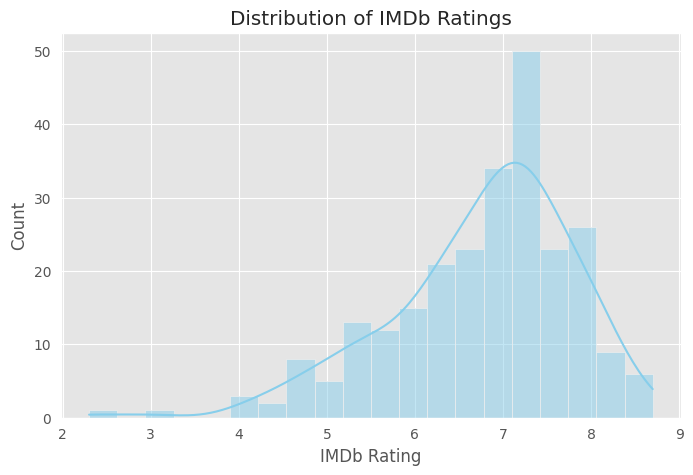

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['imdb_rating'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Count")
plt.show()

In [11]:
def plot_with_outliers(df, x_col='released_at', y_col='imdb_rating', figsize=(20, 6),
                       annotate_outliers=True, max_annotations=10, **kwargs):

    x_data = df[x_col].copy()
    y_data = df[y_col].copy()
    y_data = pd.to_numeric(y_data, errors='coerce')

    # اگر x datetime باشه، به سال تبدیل کن
    if pd.api.types.is_datetime64_any_dtype(x_data):
        x_data = x_data.dt.year


    Q1 = np.percentile(y_data, 25)
    Q3 = np.percentile(y_data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1 * IQR


    outlier_mask = (y_data < lower_bound) | (y_data > upper_bound)


    plt.figure(figsize=figsize)
    plt.scatter(x_data, y_data, label=' All data', alpha=0.5)
    plt.scatter(x_data[~outlier_mask], y_data[~outlier_mask],
                label='Normal data ', alpha=0.7, color='blue')
    plt.scatter(x_data[outlier_mask], y_data[outlier_mask],
                color='red', label=' outlier Data', s=120, edgecolor='black', linewidth=1)


    plt.axhline(lower_bound, color='gray', linestyle='--',
                label=f'IQR Lower bound({lower_bound:.2f})')
    plt.axhline(upper_bound, color='gray', linestyle='--',
                label=f'IQR Upper bound({upper_bound:.2f})')


    if annotate_outliers:
        outliers_df = df[outlier_mask].head(max_annotations)
        for idx in outliers_df.index:
            x = x_data.loc[idx]
            y = y_data.loc[idx]
            plt.annotate(f'{y:.2f}', (x, y), xytext=(3, 3), textcoords='offset points',
                         fontsize=7, color='darkred', ha='left', va='bottom',
                         bbox=dict(boxstyle='round,pad=0.2', facecolor='lightyellow', alpha=0.8))


    if 'title' in kwargs:
        plt.title(kwargs['title'])
    if 'xlabel' in kwargs:
        plt.xlabel(kwargs['xlabel'])
    if 'ylabel' in kwargs:
        plt.ylabel(kwargs['ylabel'])
    else:
        plt.title(f"{y_col} based on  {x_col}")
        plt.xlabel(x_col if not pd.api.types.is_datetime64_any_dtype(df[x_col]) else "سال")
        plt.ylabel(y_col)

    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

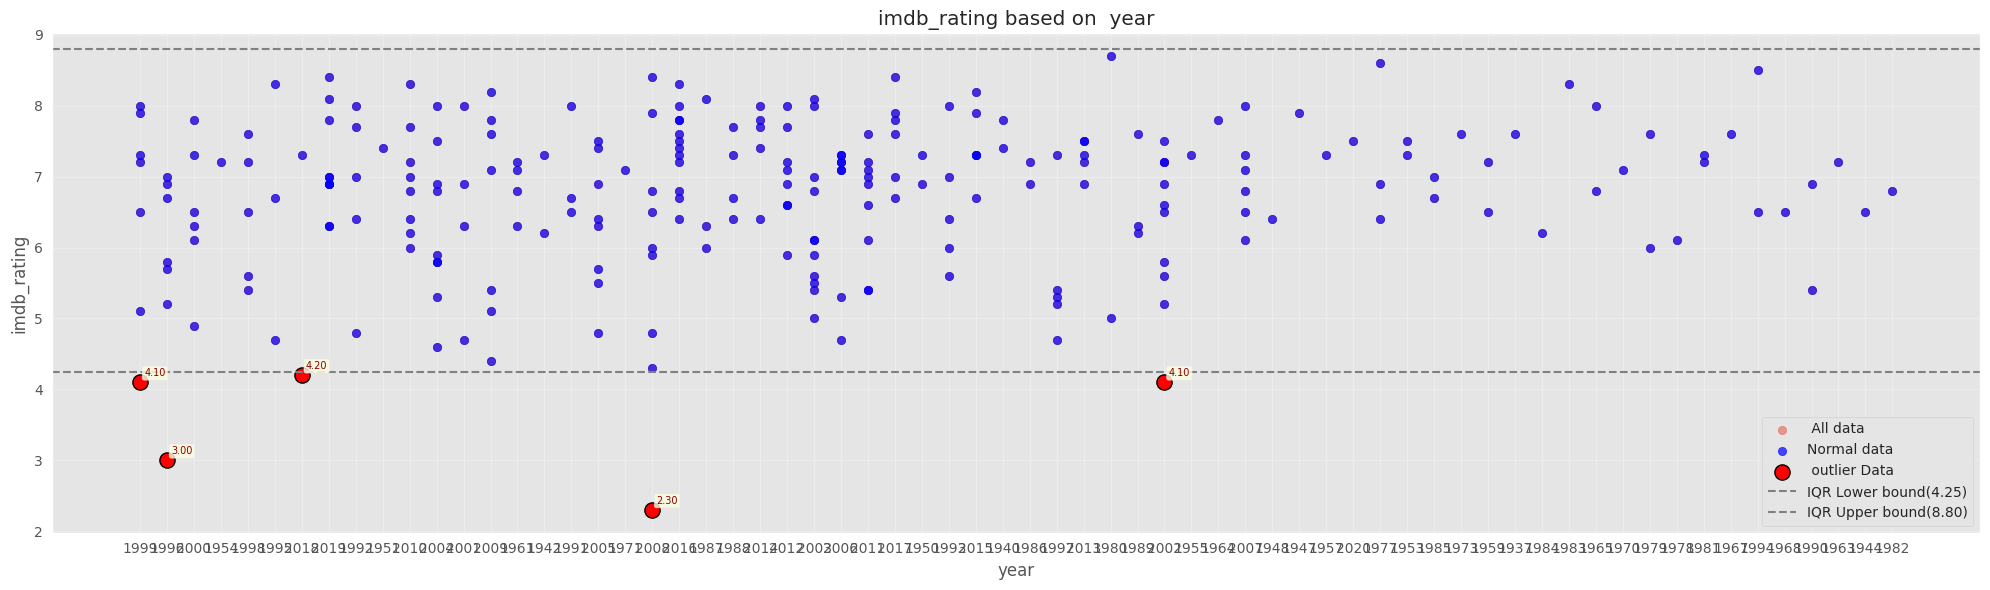

In [12]:
plot_with_outliers(df=df, x_col='year', y_col='imdb_rating')

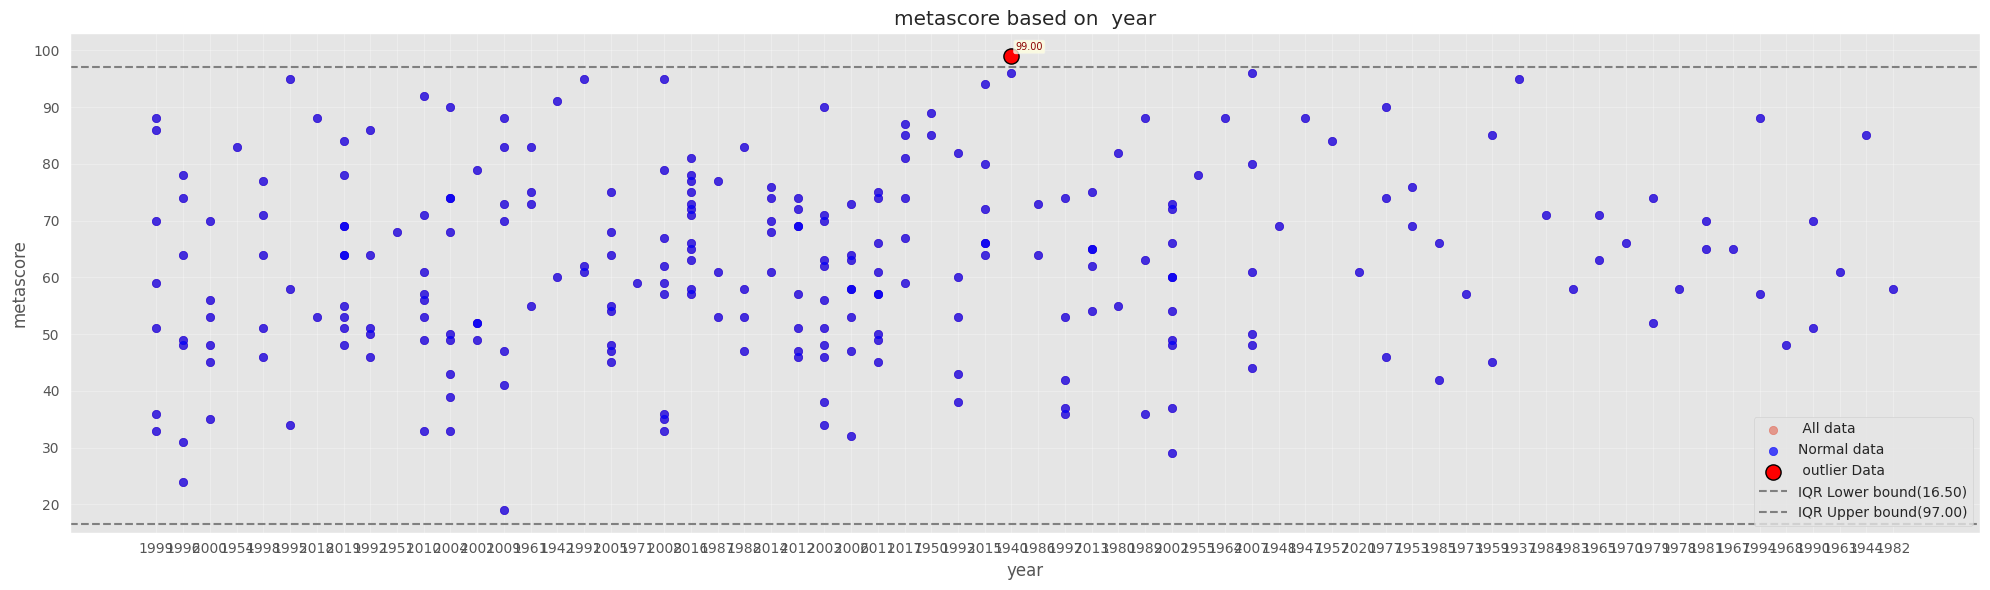

In [13]:
plot_with_outliers(df=df, x_col='year', y_col='metascore')

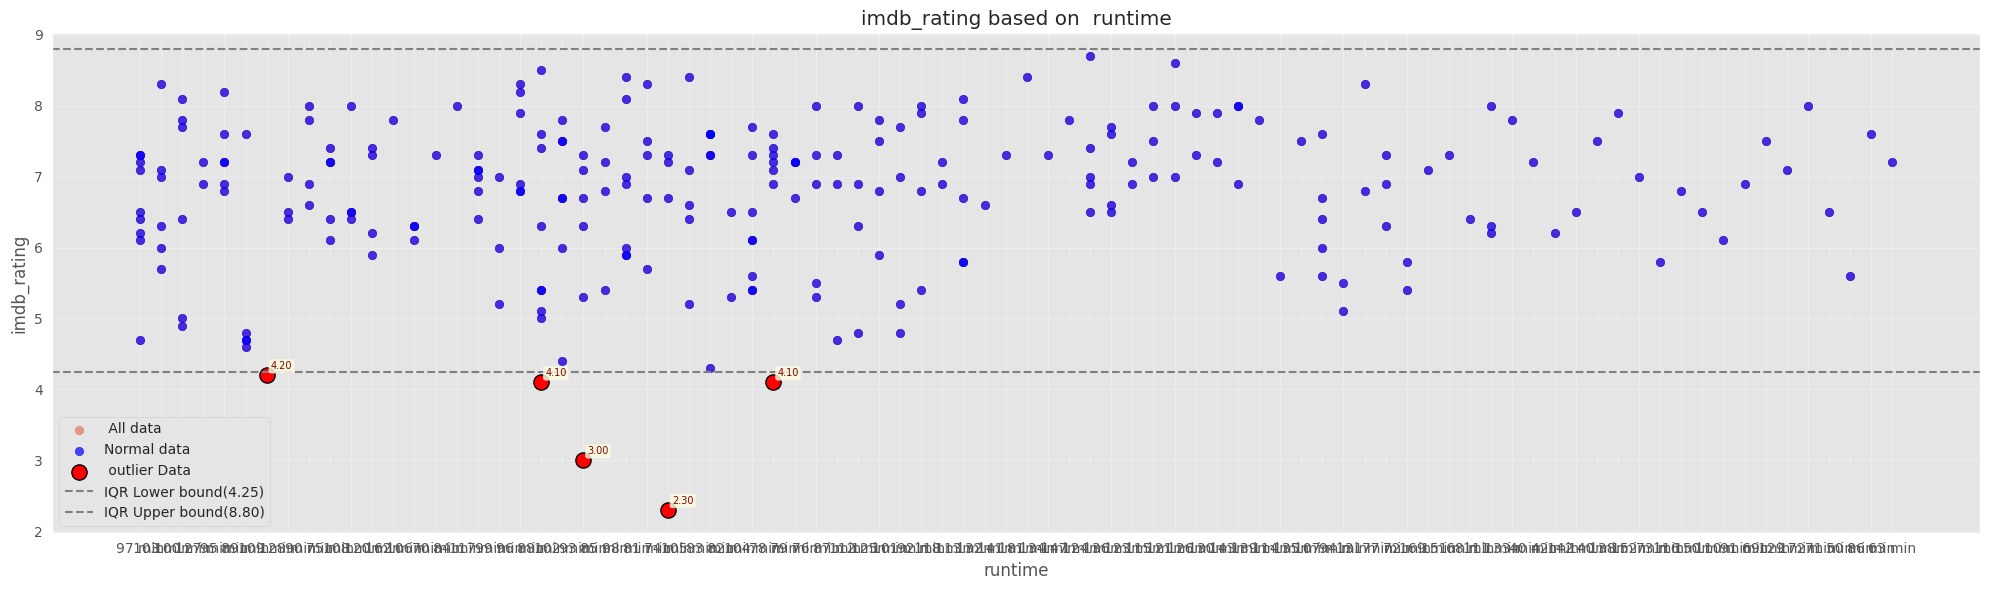

In [14]:
plot_with_outliers(df=df, x_col='runtime', y_col='imdb_rating')

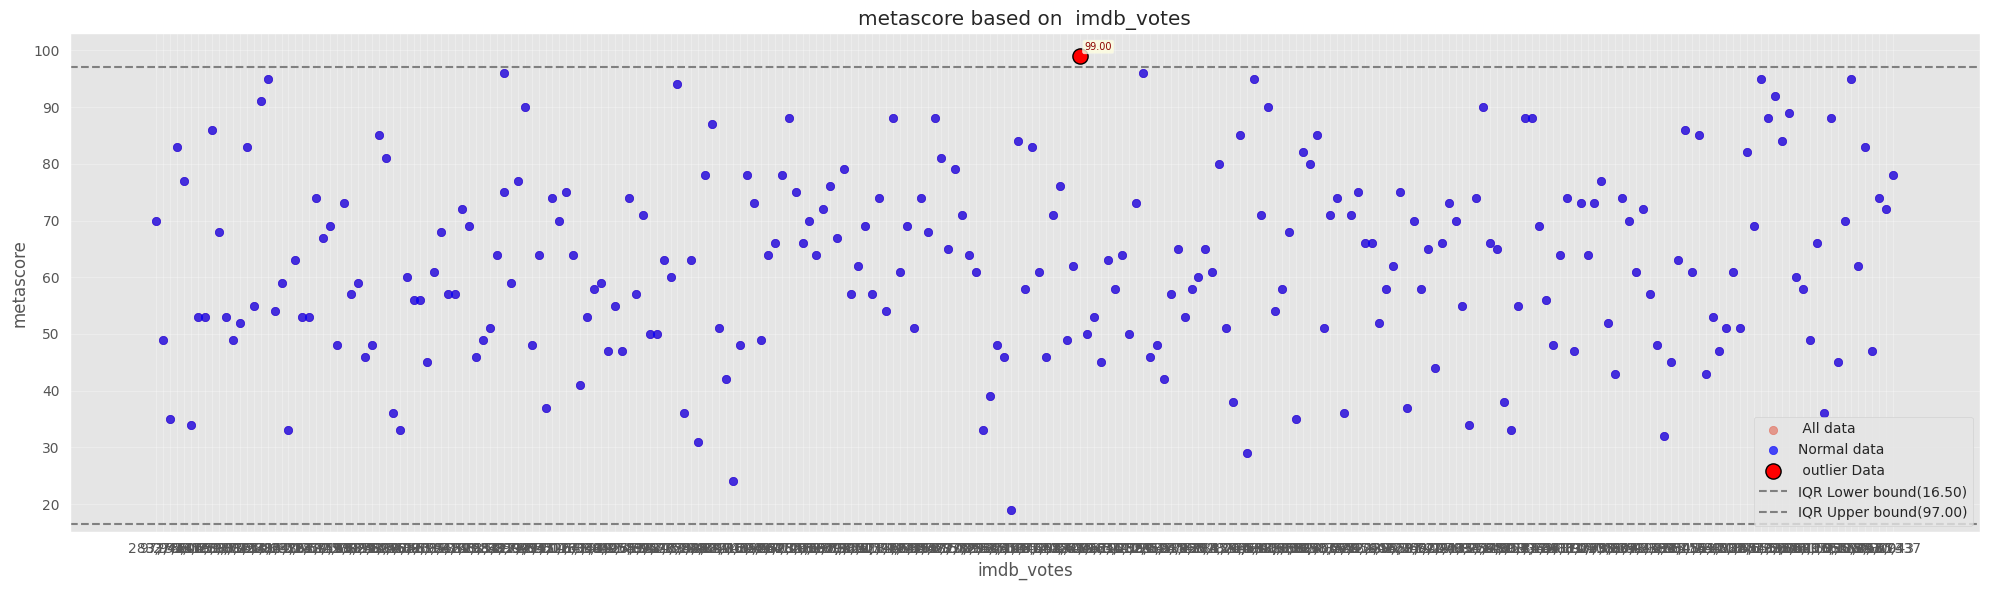

In [15]:
plot_with_outliers(df=df, x_col='imdb_votes', y_col='metascore')

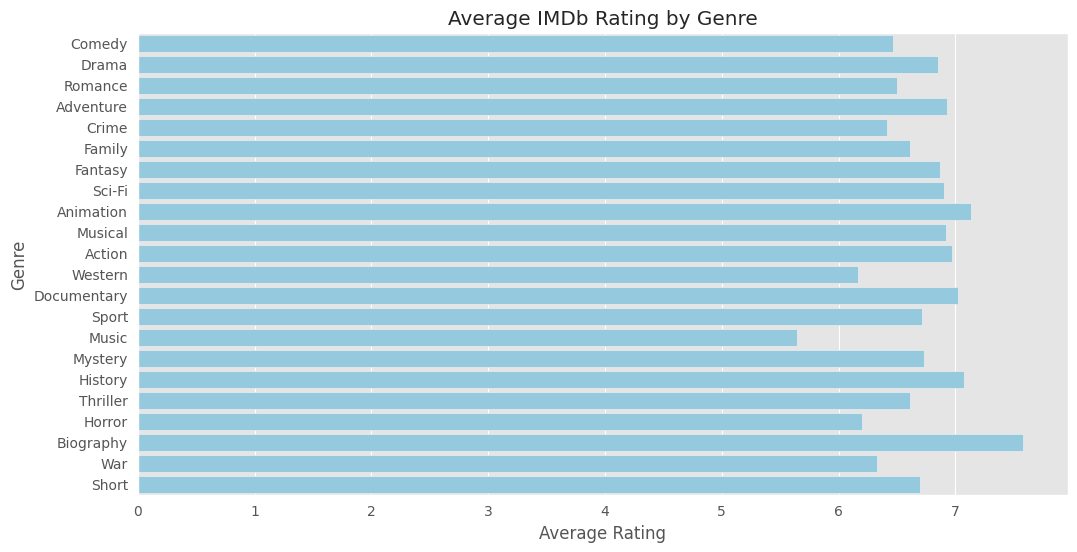

In [16]:
df_genre = df.assign(genre=df['genre'].str.split(',')).explode('genre')
df_genre['genre'] = df_genre['genre'].str.strip()

plt.figure(figsize=(12,6))
sns.barplot(x="imdb_rating", y="genre", data=df_genre, estimator=lambda x: sum(x)/len(x), ci=None, color="skyblue")
plt.title("Average IMDb Rating by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

Text(0, 0.5, '')

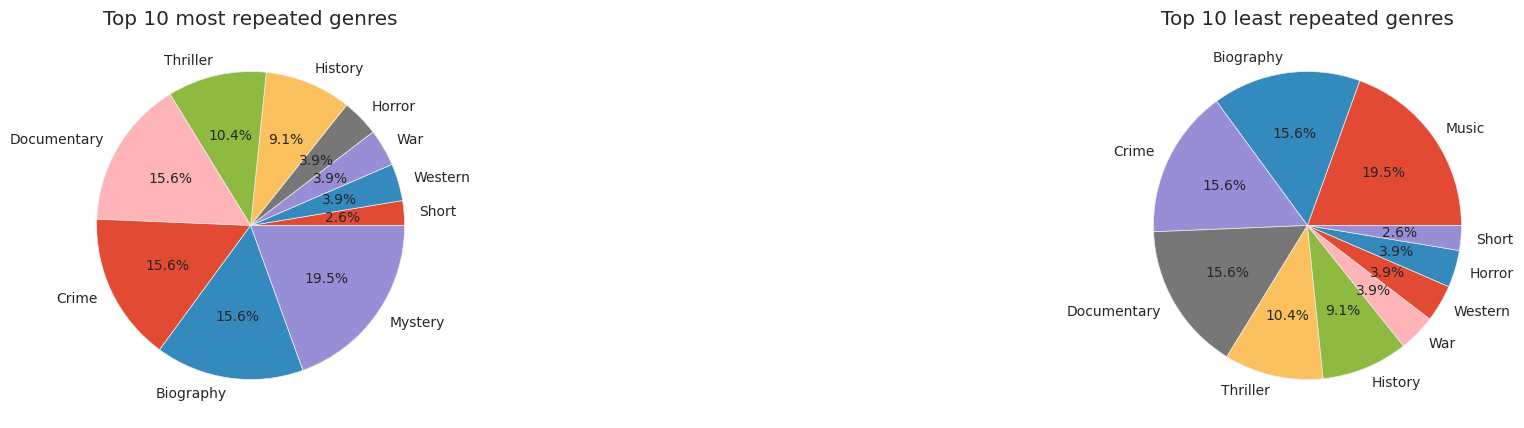

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(25, 5))

df_genre['genre'].value_counts().sort_values(ascending=True).head(10).plot.pie(autopct='%1.1f%%', ax = ax[0])
ax[0].set_title("Top 10 most repeated genres")
ax[0].set_ylabel('')

df_genre['genre'].value_counts().sort_values(ascending=False).tail(10).plot.pie(autopct='%1.1f%%', ax = ax[1])
ax[1].set_title("Top 10 least repeated genres")
ax[1].set_ylabel('')

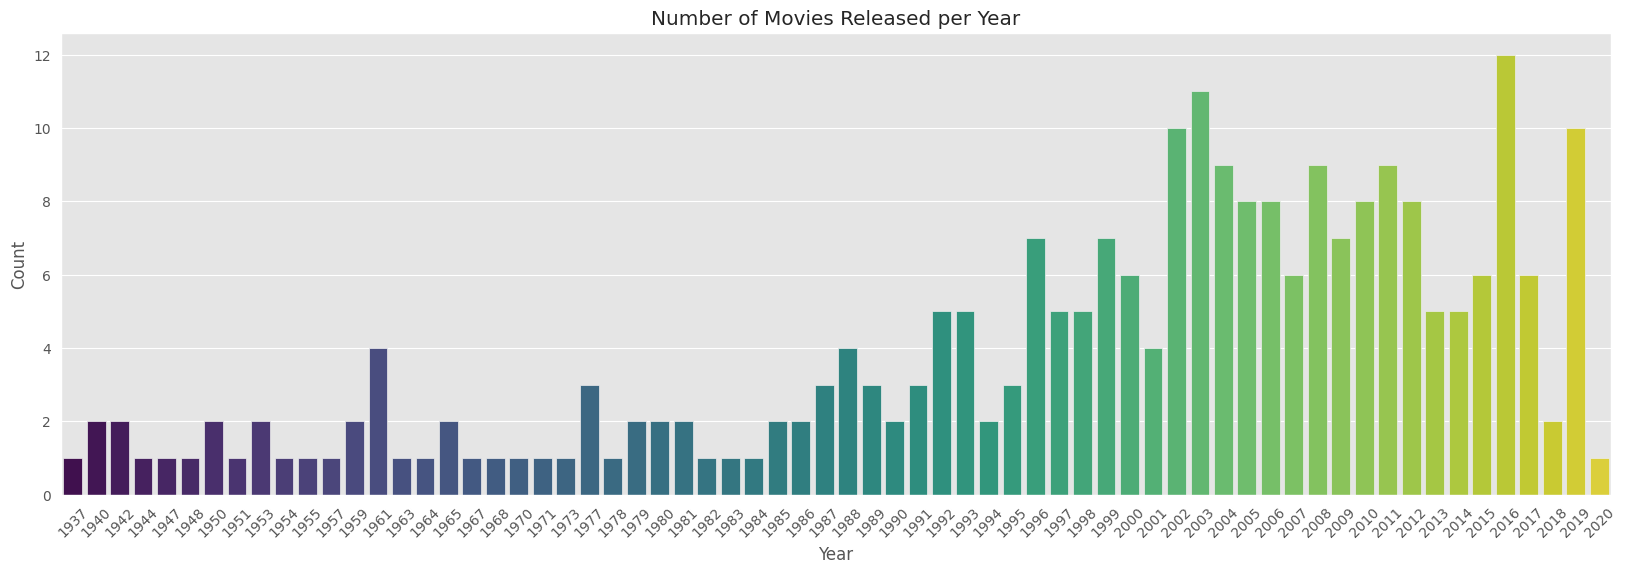

In [18]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')  # convert to numbers, set invalid to NaN
df = df.dropna(subset=['year'])                          # drop rows without year
df['year'] = df['year'].astype(int)                      # ensure integer type

plt.figure(figsize=(20,6))
sns.countplot(
    x="year",
    data=df,
    palette="viridis",
    order=sorted(df['year'].unique())   # now sorting works fine
)
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

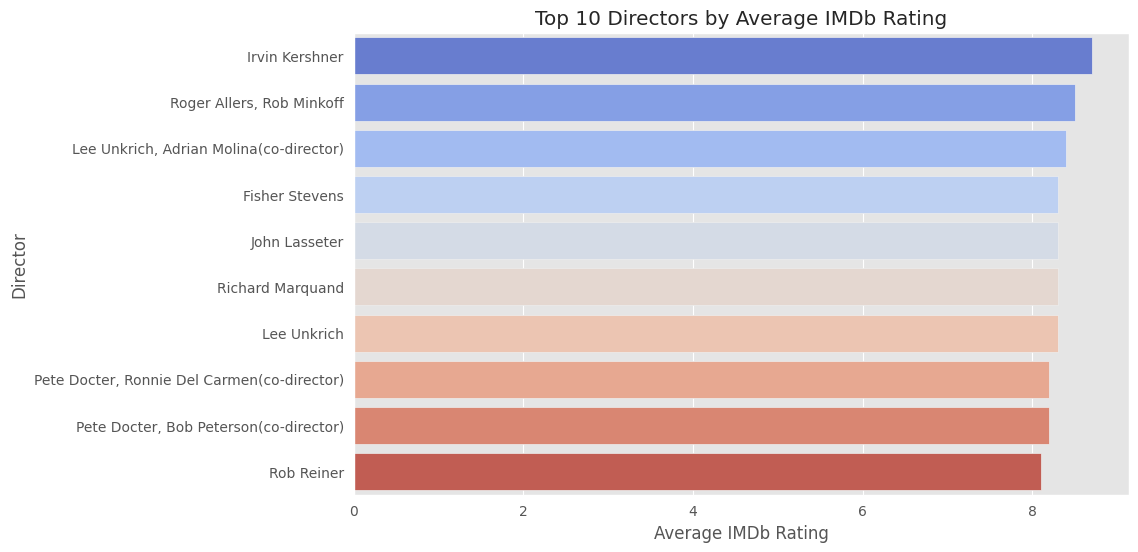

In [19]:
top_directors = (
    df.groupby("director")["imdb_rating"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(x="imdb_rating", y="director", data=top_directors, palette="coolwarm")
plt.title("Top 10 Directors by Average IMDb Rating")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Director")
plt.show()

<BarContainer object of 6 artists>

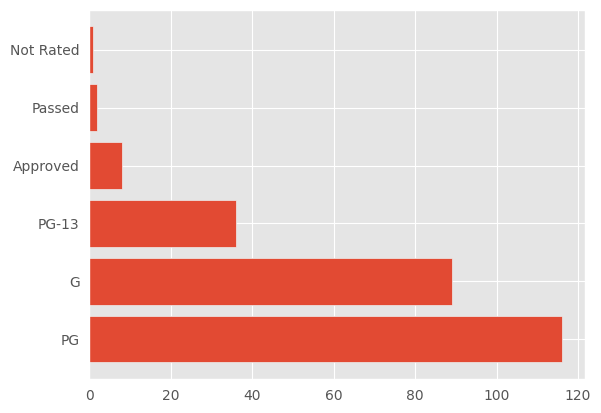

In [22]:
plt.barh(df['rated'].value_counts().index, df['rated'].value_counts().values)

Text(0.5, 1.0, 'Top 10 most Used countries')

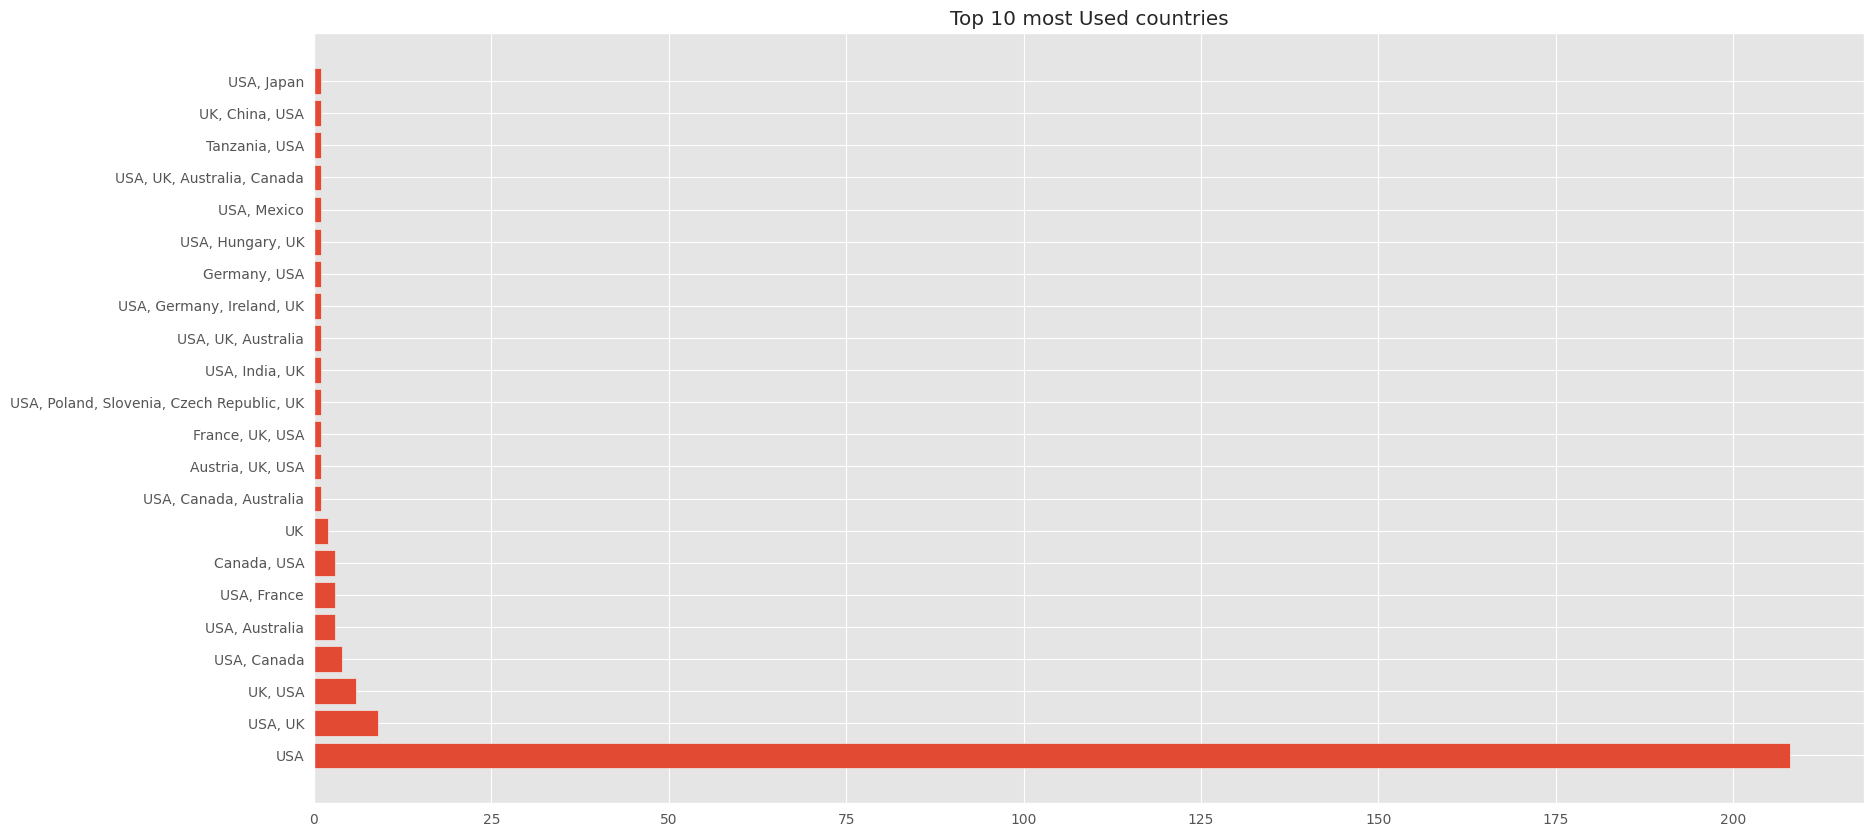

In [21]:
plt.figure(figsize=(20, 10))
plt.barh(df['country'].value_counts().index, df['country'].value_counts().values)
plt.title("Top 10 most Used countries")

Text(0.5, 1.0, 'Top 10 most Used languages')

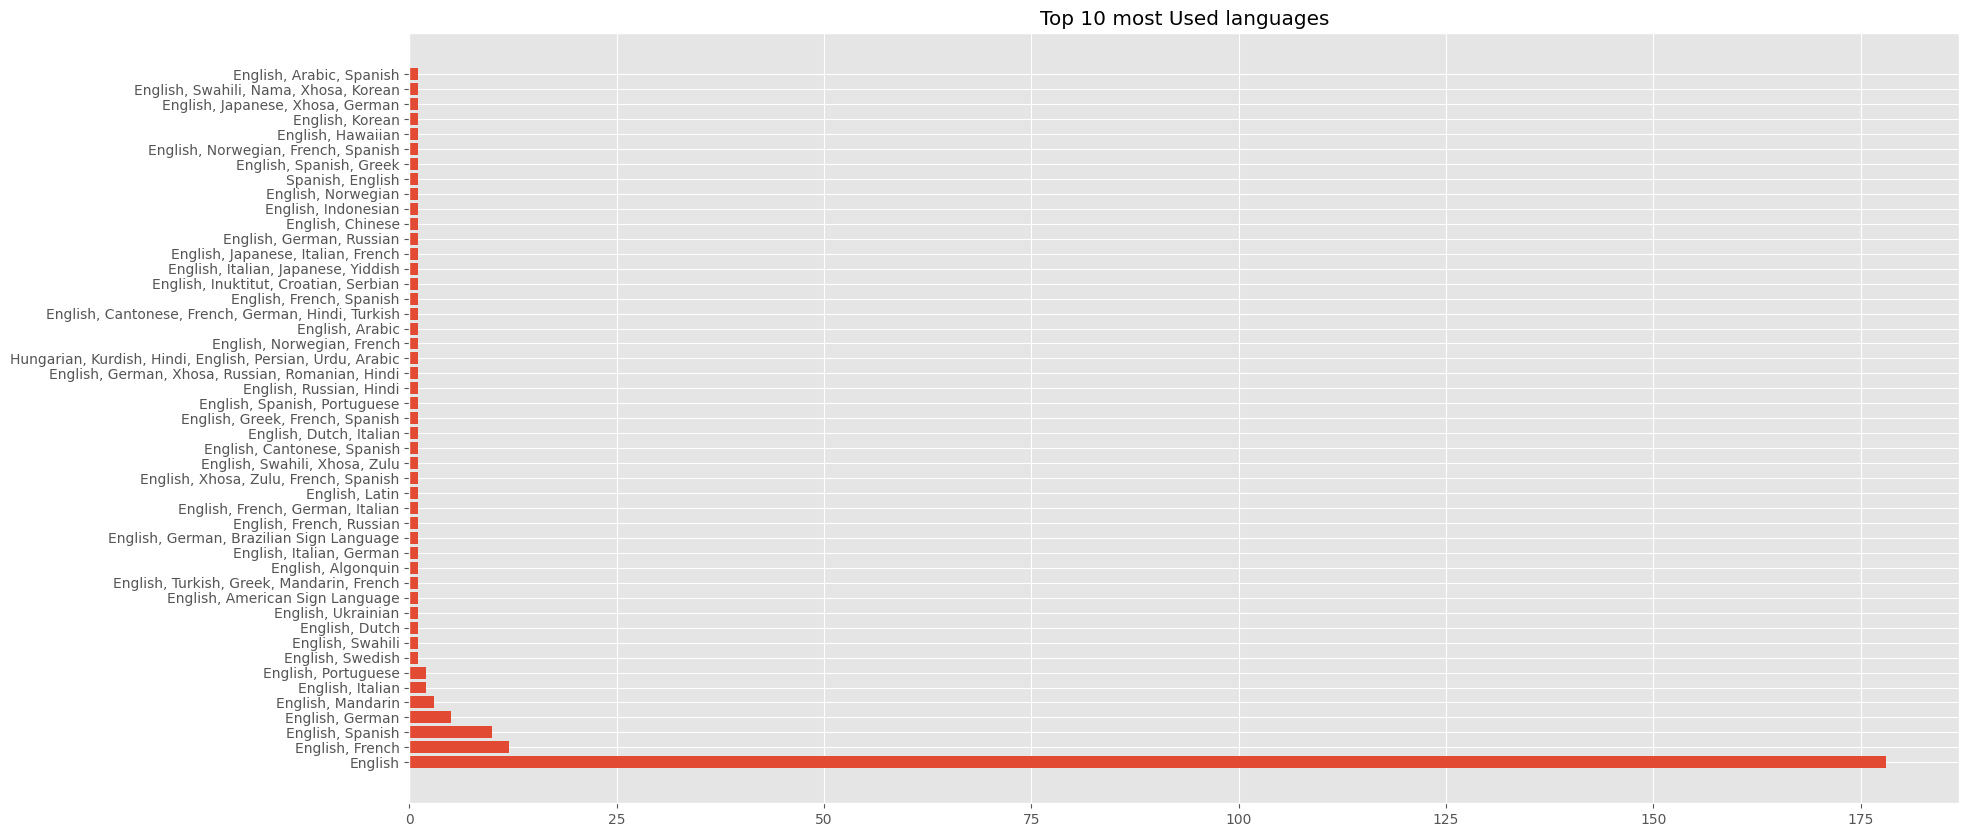

In [120]:
plt.figure(figsize=(20, 10))
plt.barh(df['language'].value_counts().index, df['language'].value_counts().values)
plt.title("Top 10 most Used languages")

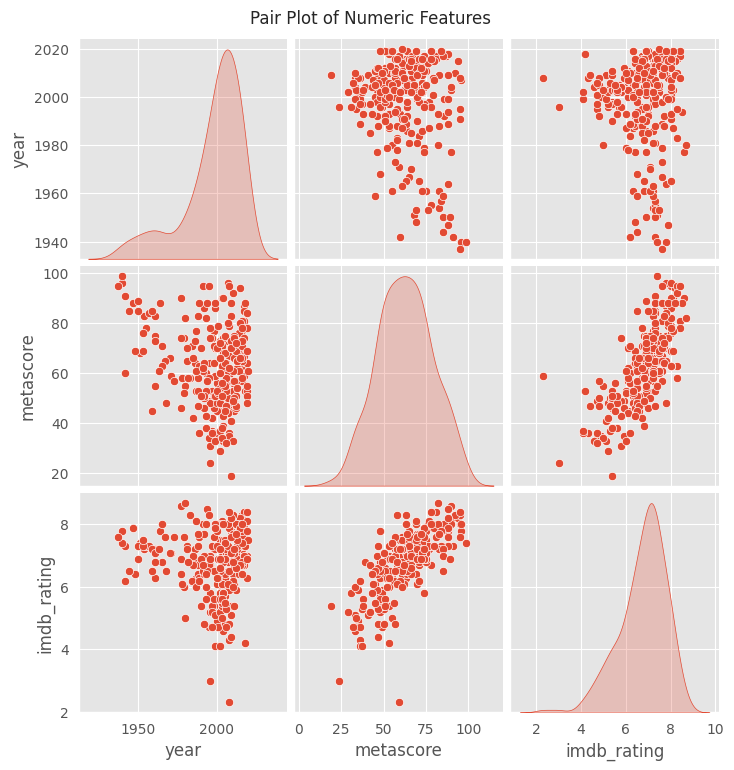

In [30]:
numeric_df = df.select_dtypes(include=[np.number])
sns.pairplot(numeric_df, diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

In [33]:
drop_cols = ['imdb_id', 'title', 'plot', 'released_at', 'added_at', 'actors', 'writer', 'director']
df = df.drop(columns=drop_cols, errors='ignore')

In [34]:
imputer = SimpleImputer(strategy="most_frequent")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [35]:
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

In [36]:
X = df.drop("rated", axis=1)
y = df["rated"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [48]:
accuracy_scores = {}

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred) * 100  # percentage
        accuracy_scores[name] = acc
        print(f"{name}: {acc:.2f}%")
    except Exception as e:
        print(f"{name} failed: {e}")

Logistic Regression: 66.67%
Decision Tree: 60.78%
Random Forest: 66.67%
Gradient Boosting: 66.67%
SVM: 50.98%
KNN: 58.82%
XGBoost: 64.71%


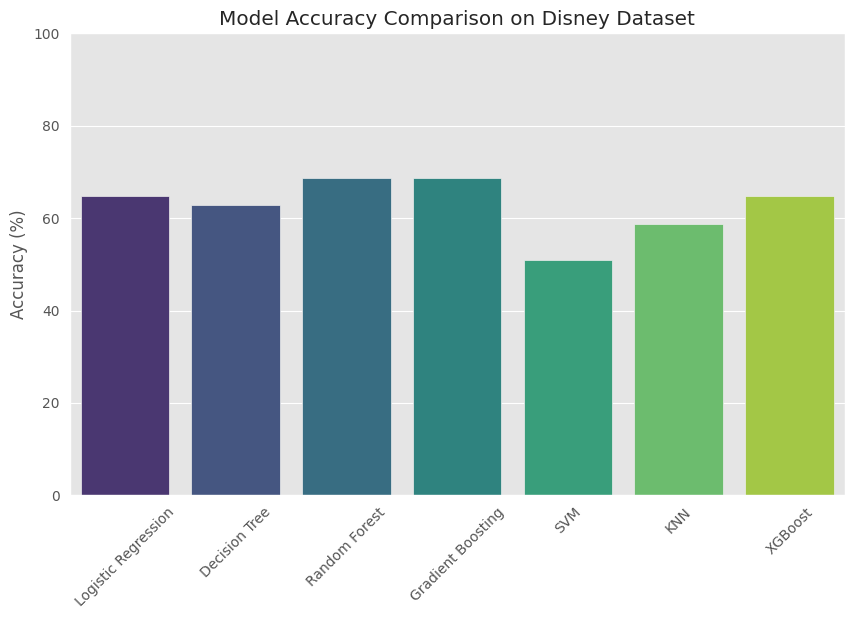

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="viridis")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison on Disney Dataset")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()